<a href="https://colab.research.google.com/github/vishakha-13/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fetching dataset


In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
x,y =mnist['data'],mnist['target']

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

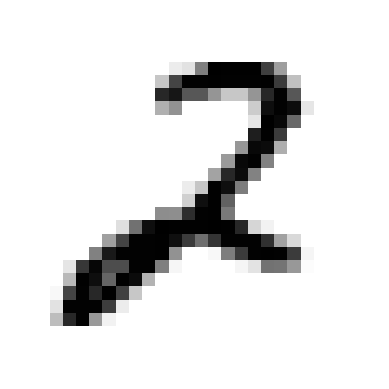

In [ ]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()

In [ ]:
import numpy as np

In [ ]:
x_train, x_test = x[:60000], x[6000:70000]
y_train, y_test = y[:60000], y[6000:70000]

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]



In [ ]:
# Creating a 2-detector
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
print(np.unique(y_train_2))


[False  True]


In [ ]:
# Train a logistic regression classifier
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)
example = clf.predict([some_digit])
print(example)


[ True]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross Validation
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())

0.9789833333333333
